# EXTRA TREES

EXtremely randomized tress or Extra trees:
An ensemble of descision trees in which the individual trees are trained on differnt random subsets of features in the training data
using random split points( rather than finding best thresholds) (select threshold at random)

Averaging  vs Boosting

A: indvi learners are independent

B: indvi learnes are linked to prev learners


A: built parallel

B: build each model sequentioally (not scalable)

A: not learn from mistakes

B: learn from mistakes

#**BAGGING AND PASTING REGRESSION**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
concrete_data = pd.read_csv(r'/content/drive/My Drive/Concrete_Data_Yeh.csv')
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concrete_data.shape

(1030, 9)

In [5]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Text(0, 0.5, 'csMPa')

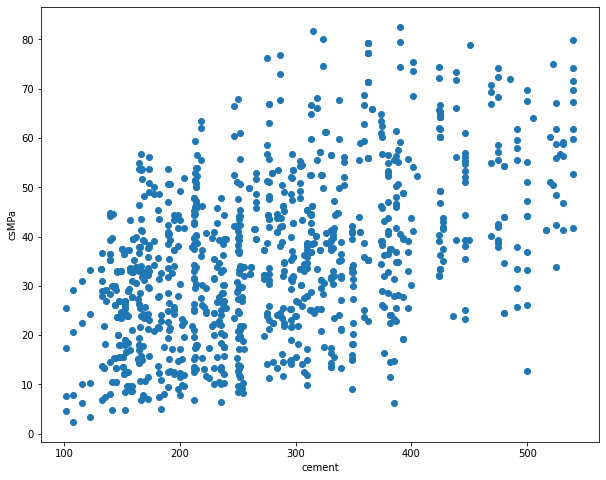

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))

plt.scatter(concrete_data['cement'], concrete_data['csMPa'])

plt.xlabel('cement')
plt.ylabel('csMPa')

Text(0, 0.5, 'csMPa')

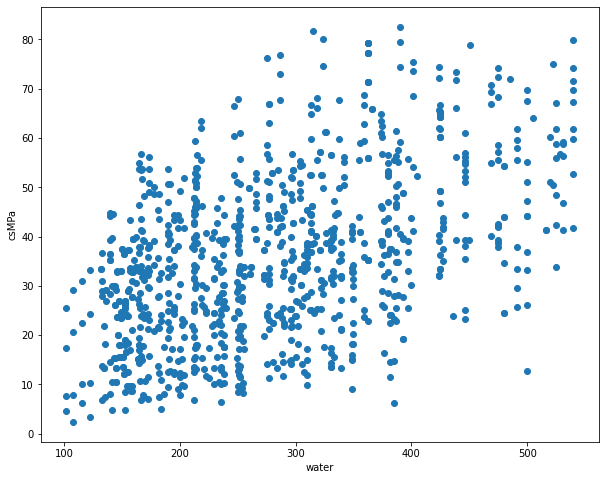

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))

plt.scatter(concrete_data['cement'], concrete_data['csMPa'])

plt.xlabel('water')
plt.ylabel('csMPa')
# negative relation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


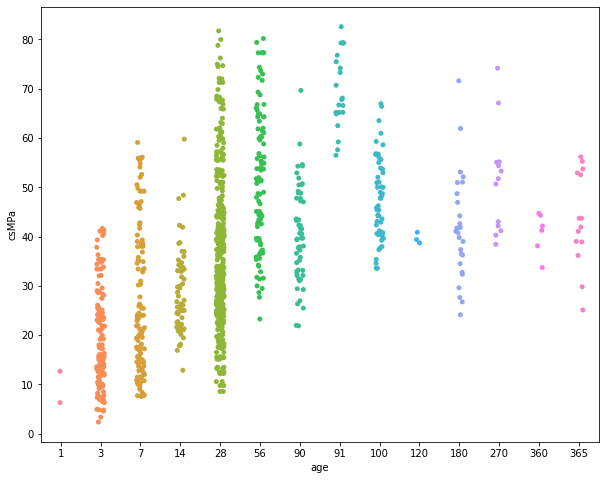

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
import seaborn as sns
sns.stripplot(concrete_data['age'], concrete_data['csMPa']) # strippot is almost like scatterplot for categorical data

In [ ]:
concrete_data_corr = concrete_data.corr()
concrete_data_corr

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


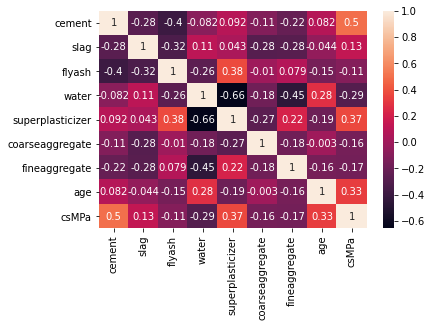

In [ ]:
sns.heatmap(concrete_data_corr, annot=True)

In [ ]:
x = concrete_data.drop('csMPa', axis=1)
y = concrete_data['csMPa']

In [ ]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: csMPa, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

Note : Inside the baggingRegressor("BASE_ESTIMATOR"), we have choosen descision tree, you can choose whatever regression u want

In [ ]:
bag_reg  = BaggingRegressor(DecisionTreeRegressor(), n_estimators= 500, 
                            bootstrap= False,  # sample without replacement (False --> pasting)
                            max_samples = 1.0, # draw entire samples
                            n_jobs = -1) 

In [ ]:
bag_reg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=F

In [ ]:
y_pred = bag_reg.predict(x_test)

In [ ]:
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df.sample(10)

,Actual,Predicted
191,22.84,24.68554
261,37.40,31.98178
389,44.13,44.09000
864,31.87,31.69556
728,31.74,31.45000
868,44.28,44.28000
391,55.65,55.55000
131,52.20,46.68000
189,10.38,7.79512
418,11.98,16.67250


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # good

0.8384595486956151

In [ ]:
# plot both graphs orig, pred 

#**BOOSTING**
note: set bootstrap to True for Bagging    
set oob_score = True   
set max_sample to 0.8 (80 percent)


In [ ]:
bag_reg  = BaggingRegressor(DecisionTreeRegressor(), n_estimators= 500, 
                            bootstrap= True,  # sample with replacement (Fasle --> pasting)
                            max_samples = 0.8, # draw entire samples
                            n_jobs = -1,
                            oob_score = True) # out of bag evaluation (instances not used in training are used after trainig )

In [ ]:
bag_reg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [ ]:
bag_reg.oob_score_ # indicator of how well it will perform on new test data

0.9164943022852209

In [ ]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred) # observve that it is close to the oob_score_

0.8916162692181966

#**RANDOM SUBSPACES METHOD**
this is pasting again...

subsampling of features of train data and not the records

all samples are used for each individual predictor however each inividual predictor in our subsample will be trained using a fraction of input features

works well if more dimensions are there in the input (more features)

In [ ]:
bag_reg  = BaggingRegressor(DecisionTreeRegressor(), n_estimators= 500, 
                            bootstrap= True,  # sample without replacement (Fasle --> pasting)
                            max_samples = 1.0, # draw entire samples
                            n_jobs = -1,
                            bootstrap_features = True,
                            max_features = 0.8) # out of bag evaluation (instances not used in training are used after trainig )

In [ ]:
bag_reg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [ ]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.7572830078592448

In [ ]:
# this is a little lower..didn't  work well for our dataset.

#**RF and Xtra TREES**

In [ ]:
from sklearn.ensemble import RandomForestRegressor # note it is bagging by default, can change it to pasting by setting bootstrap fasle
rand_reg = RandomForestRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)
rand_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=12,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rand_reg.predict(x_test)
r2_score(y_test, y_pred)

0.777802378817003

where exactly the features lies and where the node exist in depth of the tree is  a measure of relative importance of the feature

feature where node is close to root of tree have greater effect on final predicted value



#**FEATURE IMPORTANCES**

In [ ]:
important_features = pd.Series(rand_reg.feature_importances_, index=x.columns).\
sort_values(ascending=False)

important_features

age                 0.406970
cement              0.356838
water               0.083451
slag                0.065778
superplasticizer    0.065699
fineaggregate       0.012740
flyash              0.006386
coarseaggregate     0.002139
dtype: float64

In [ ]:
# then do PCA or dimensionality reducn

In [ ]:
#the extra randomness by the randomforrest contibuted to the better r2 score when we compare it with bagging descision tree

#**EXTRA TRESS**
uses random threshold not best threshold as in case of RF

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
extra_reg = ExtraTreesRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)
extra_reg.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=12,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=600, n_jobs=-1, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
# note it uses pasting by default

In [ ]:
y_pred = extra_reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
#r2_score
# do the feature importance

0.7204819623795149

In [ ]:
# you can also do feature importance for classification

#**ADABOOST**

ADAPTIVE BOOSTING --> trains model in sequence

 the misclassified training points from each individual learner are UPWEIGHTED.
# they occur over and over...thus seq learner learns more about the mistake
Higher Weights --> assigned to more accurate predictors

neagative weight --> wrong pred

zero weight--> guessed prediction not learning 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor # we have choosen this, you can replace with any reg model # these are weak learners

In [ ]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                            n_estimators=100,
                            learning_rate = 1.0)

adaboost: apply weakleraners in sequence
early stopping is on..if found before 100
learnig rate.. shrinks the contribution of each regressor by learnig rate
trade off--- btw learning rate and N_estimators

In [ ]:
ada_reg.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [ ]:
y_pred = ada_reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8150594739941516

**NOTE: HIGH R2 SCORE ABOVE**

In [ ]:
ada_reg.estimator_weights_

array([1.7493934 , 1.37065286, 1.11688134, 1.12948373, 1.13170663,
       0.95459366, 1.16973557, 1.23820419, 0.98457279, 0.94747178,
       0.92672723, 0.72118977, 1.34654821, 1.0998886 , 1.26961957,
       0.69599356, 0.8033019 , 1.20178683, 0.75059287, 1.246172  ,
       0.88826424, 1.20602756, 0.79557185, 0.64621238, 1.30036258,
       0.8548096 , 0.77882858, 0.86206138, 1.45746967, 0.97968291,
       0.87243322, 0.72844043, 1.21069891, 0.58371751, 0.64435494,
       0.47208296, 0.73408747, 0.75147927, 0.36448866, 0.80378414,
       1.23214438, 0.37945628, 0.30935824, 0.76206488, 0.62011822,
       0.76717915, 0.85290879, 0.64478872, 0.59463939, 0.60088637,
       0.62122586, 0.89834266, 0.60439685, 0.53732927, 0.36219196,
       0.94359175, 1.05292207, 0.51234043, 0.91053614, 0.39631191,
       1.07106527, 0.93663094, 1.08577742, 0.35859641, 0.71738059,
       0.48351509, 0.87344159, 0.72026079, 0.55253313, 0.83196326,
       1.08247725, 0.89278701, 0.91847091, 0.9983137 , 0.77197

In [ ]:
# 100 weights corresponding to 100 estimators

In [ ]:
new_ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),
                                n_estimators=200,
                                learning_rate = 0.5)

In [ ]:
new_ada_reg.fit(x_train, y_train)
y_pred= new_ada_reg.predict(x_test)
r2_score(y_test, y_pred)

0.7260565265123788

note r2 square has reduced if we half the learning rate, and incr the estimators (double)

play around to find best accuracy

#**GRADIENT BOOSTING**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# (each descison tree will learn from their prev tree in sequence)

In [ ]:
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

example of residual error

In [ ]:
y2 = y_train - tree_reg1.predict(x_train)
y2[:10]

926     4.606176
625    -6.999281
222   -11.289281
195    -2.428400
457    -0.649281
622    -3.769281
984   -16.303824
97      5.551667
218     0.470719
542   -18.059281
Name: csMPa, dtype: float64

In [ ]:
# these are RESIDUAL ERRORS --> the Actual - Predicted y values

In [ ]:
tree_reg2 = DecisionTreeRegressor(max_depth=4)
tree_reg2.fit(x_train, y2) # not we train on y2 (residual error)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y3 = y2 - tree_reg2.predict(x_train) # 3rd residual error

In [ ]:
tree_reg3 = DecisionTreeRegressor(max_depth=5)
tree_reg3.fit(x_train, y3) # not we train on y2 (residual error)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y4 = y3 - tree_reg3.predict(x_train)

In [ ]:
#finally 

In [ ]:
y_pred = sum(tree.predict(x_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7778959274344865

# **NOTE: HIGH R2 SCORE**

So, as we add more residual erros like we did before and increase the max_depth for the models, the r2_score is getting better

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = gbr.predict(x_test)
r2_score(y_test, y_pred)

0.7524464290976497

In [ ]:
# this is low, so tweaking the parameterss

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=30, learning_rate=0.1) # we lower the learnig rate significantly, but note thaat it will
# also depend on the n_estimators, they are inversely prop, hence incr the n_estimators to 30
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = gbr.predict(x_test)
r2_score(y_test, y_pred)


0.8331766484310745

# **HIGHEST R2_score**

#**HYPERPARAMETER TUNING**

In [ ]:
# hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
x = x.drop(['flyash', 'coarseaggregate', 'fineaggregate'], axis=1)

In [ ]:
# we are reducing these to save computing time

In [ ]:
x.head()

,cement,slag,water,superplasticizer,age
0,540.0,0.0,162.0,2.5,28
1,540.0,0.0,162.0,2.5,28
2,332.5,142.5,228.0,0.0,270
3,332.5,142.5,228.0,0.0,365
4,198.6,132.4,192.0,0.0,360


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
# GBR
baseline = GradientBoostingRegressor(max_depth=3, n_estimators=50)
baseline.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = baseline.predict(x_test)
r2_score(y_test, y_pred)

0.8806378421290638

**NOTE: THE r2 score above**

In [ ]:
important_features = pd.Series(baseline.feature_importances_, index=x.columns).\
sort_values(ascending=False)
important_features

age                 0.386522
cement              0.335692
slag                0.106598
water               0.092166
superplasticizer    0.079022
dtype: float64

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3)

In [ ]:
parameters = {'n_estimators': [1, 5 ,10, 50, 100, 200, 300, 400, 500]} # the hyperparametr we want to tune
gridsearch_reg = GridSearchCV(estimator=gbr, param_grid=parameters, cv=3) # 3 fold cross calidation, 2 to train , 1 to validate

In [ ]:
gridsearch_reg.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
gridsearch_reg.best_params_

{'n_estimators': 500}

**thus 500 is the bestparam for n_estimators**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) # reshuffle the data

In [ ]:
gbr_best = GradientBoostingRegressor(max_depth=3,n_estimators=500)
gbr_best.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred  = gbr_best.predict(x_test)
r2_score(y_test, y_pred)

0.9377386134730828

# **NOTE: HIGHEST ACCURACY IN WHOLE NOTEBOOK**

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, warm_start=True) # 

In [ ]:
from sklearn.metrics import mean_squared_error

we cannot gain insights or verify with grid search cv, hence print all and use EARLY STOPPING

In [ ]:
min_val_error = float('inf')
error_increasing = 0

for n_estimators in range (1, 1000):
  gbr.n_estimators = n_estimators
  gbr.fit(x_train, y_train)

  y_pred = gbr.predict(x_test)
  val_error = mean_squared_error(y_test, y_pred)

  print('no of est:', gbr.n_estimators)
  print('validation error:', val_error)

  if val_error < min_val_error:
    min_val_error = val_error
    error_incresaing = 0
  else:
    error_increasing +=1
    if error_increasing == 10: # this is early stopping
      break
  

no of est: 1
validation error: 244.24083925863783
no of est: 2
validation error: 217.54158517989617
no of est: 3
validation error: 194.19065845537736
no of est: 4
validation error: 175.17137624458087
no of est: 5
validation error: 158.22741152851606
no of est: 6
validation error: 145.72788519060532
no of est: 7
validation error: 134.26029559267303
no of est: 8
validation error: 123.69199599976515
no of est: 9
validation error: 115.31071280101457
no of est: 10
validation error: 107.05778349288607
no of est: 11
validation error: 101.22082961060069
no of est: 12
validation error: 94.84053967837791
no of est: 13
validation error: 89.74313184073321
no of est: 14
validation error: 84.61274009107122
no of est: 15
validation error: 79.83279642486048
no of est: 16
validation error: 75.43878396381712
no of est: 17
validation error: 72.374833207898
no of est: 18
validation error: 68.71491806230823
no of est: 19
validation error: 65.93441443092313
no of est: 20
validation error: 63.35699974810902


In [ ]:
n_estimators

144

In [ ]:
# retrain the model with n_estimator = 144
# calculate the r2_score

#**MODEL STACKING**

In [ ]:
# trainset, holdoutset, testset

# STACK GENERALISATION: how should individual learners be combined to give final output? (voting, stacking)
# train additional model
# This model is trained on the predictions of the individual learner --> Metalearner or Blender model
